In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./wine.data.csv')
df.head()

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
label = df.iloc[:,0]
df.drop(labels='Label',inplace=True,axis=1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


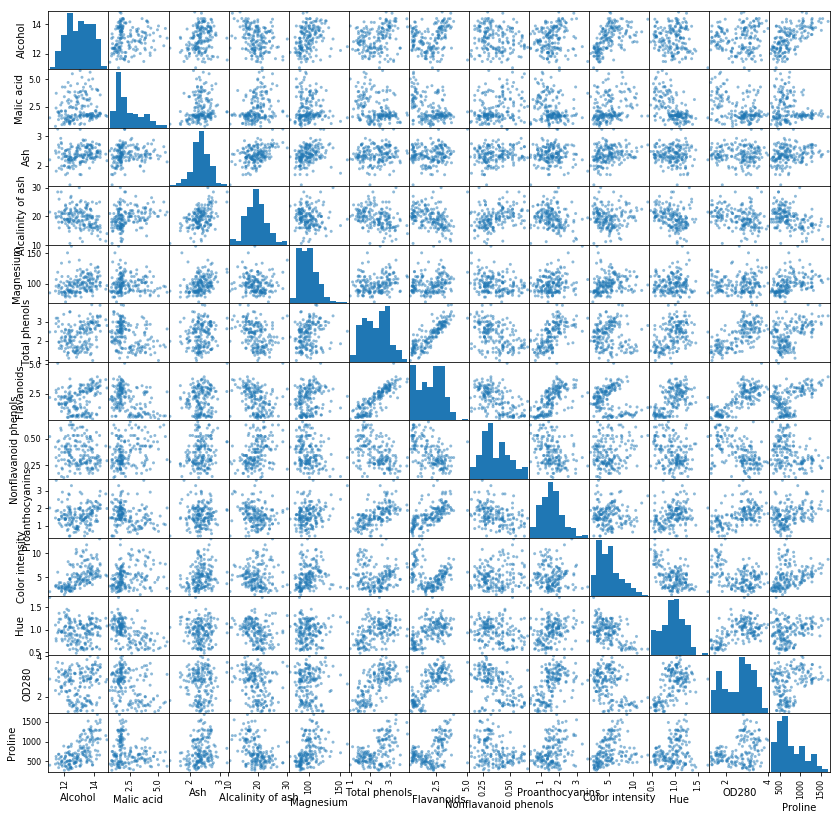

In [4]:
from pandas.plotting import scatter_matrix
# plt.figure(figsize=(10,10))
scatter_matrix(df,figsize=(14,14))
plt.show()

We can see that the pairs mentioned bellow shows linear relations

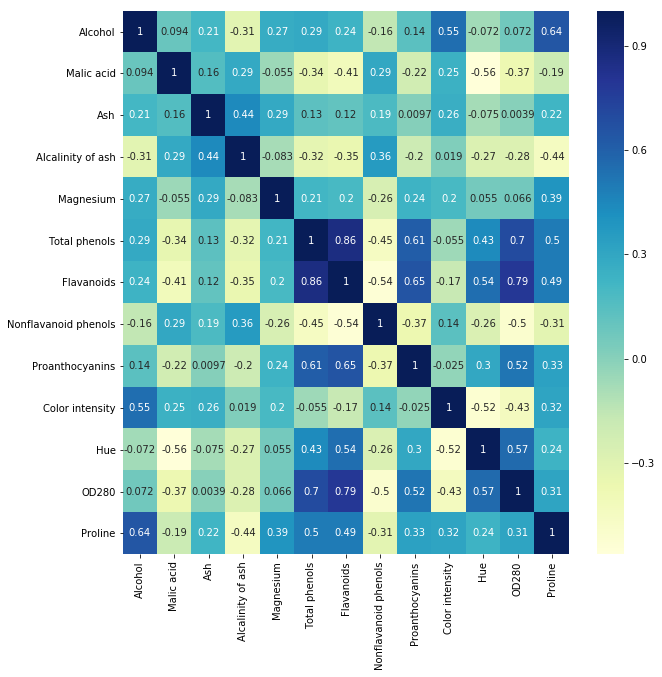

In [5]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

#### Pairs have high correlation
Flavanoids, Total phenols
OD280, Flavanoids

### Normalizing data


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
print(scaler.fit(df))

StandardScaler(copy=True, with_mean=True, with_std=True)


/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [9]:
X_scaled_array = scaler.transform(df)
X_scaled_array

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
normalizedData = pd.DataFrame(X_scaled_array,columns=df.columns)
normalizedData.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### KMean clusters

In [52]:
from sklearn.cluster import KMeans

%matplotlib inline

In [53]:
Kmean = KMeans(n_clusters=3,random_state=42)
y_kmean = Kmean.fit_predict(normalizedData)

In [70]:
y_kmeanDF =pd.merge(normalizedData, y_kmean)

ValueError: can not merge DataFrame with instance of type <class 'numpy.ndarray'>

ValueError: Must pass DataFrame with boolean values only

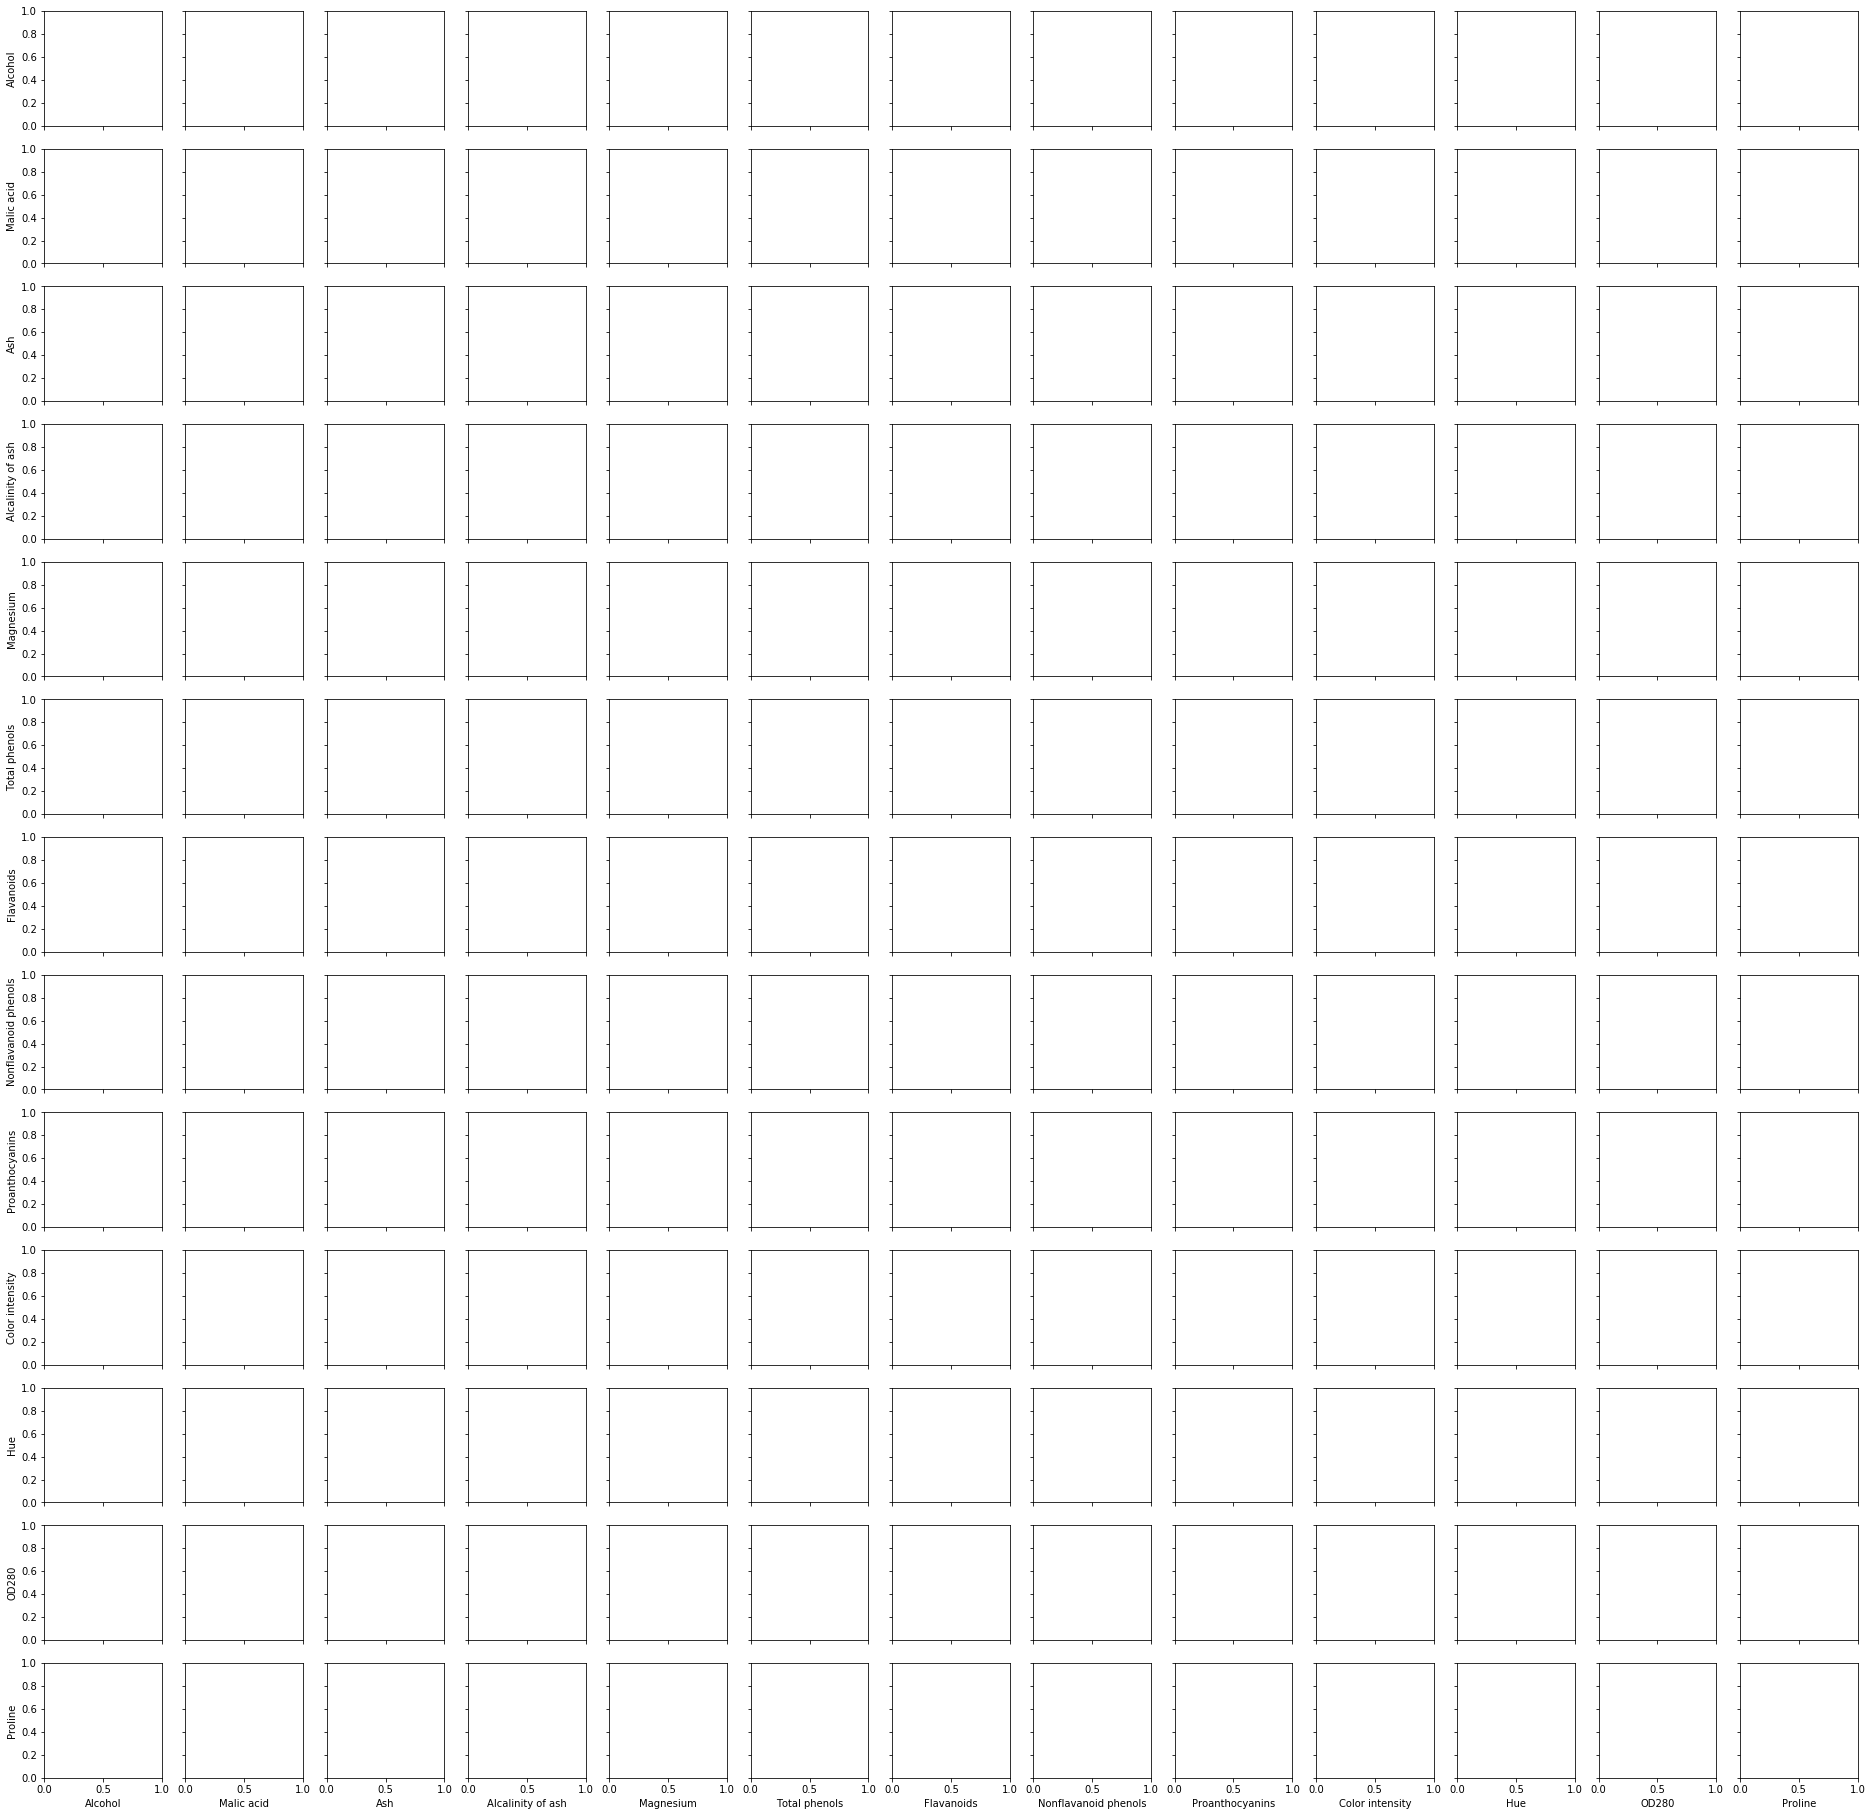

In [69]:
sns.pairplot(y_kmeanDF,hue_order=)
plt.show()

By using explained_variance_ratio_ attribute, we know that first 6 PCAs
explain 85.1% of variance if we reduce the dimension using PCA. 
You need to apply PCA with 6 components for the above normalized data. Then
reduction applying kMeans (3 clusters) to cluster the data after dimensionality


In [37]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=6)
transformed = pd.DataFrame(pca.fit_transform(normalizedData))

In [42]:
KmeanAfter = KMeans(n_clusters=3,random_state=42)
y_kmeanAfter = KmeanAfter.fit_predict(transformed)

Use adjusted_rand_score in sklearn.metrics.cluster to calculate the scores of
original kMeans and kMeans after PCA. What is your conclusion?

In [43]:
from sklearn.metrics.cluster import adjusted_rand_score

In [44]:
adjusted_rand_score(y_kmean,y_kmeanAfter)

0.4300971337664209

Conclusion: 0.43 is closer to 0 meaning KMneans 3 clusters is not matched very closely with true mean.